# Exercice 5 : Chaos Game par Numa Gout

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Question 1 :

Nous allons modéliser le joint de Sierpinski :
- On considère un triangle équilatéral de coté 1.
- On choisit un point dans ce triangle de manière aléatoire
- On choisit le prochain point de la suite comme étant le milieu du point précédent avec un des trois sommets du triangle, choisi de manière aléatoire

**Procédure**

Nous allons utiliser les nombres complexes qui sont facilement manipulable sur python et adapté à beaucoup de bibliothèque, surtout numpy.

In [2]:
# On initialise les sommets du triangle
sommets = [0, 1, np.exp(np.pi/3 * 1j)]

In [3]:
def passage_sierpinski(p):
    ''' Prend en entrée un nombre complexe et renvoie l element suivant '''
    global sommets
    return ((p + np.random.choice(sommets))/2)

In [4]:
def zone_sierpinski(n):
    ''' Renvoie les n premiers termes de la suite de Sierpinski '''
    global sommets
    b = True
    while b: # boucle pour choisir aleatoirement un point dans le triangle
        x, y = np.random.rand(), np.random.rand()
        if x>1/2 and y<np.sqrt(3)*(1-x):
            b = False
        elif x<1/2 and y<np.sqrt(3)*x:
            b = False
            
    P = [x+1j*y] # Initialisation de la liste des valeurs
    for i in range(n):
        P.append(passage_sierpinski(P[-1]))
    return P

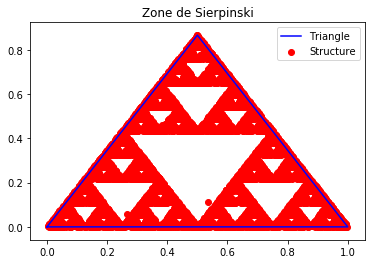

In [5]:
# On plot les termes de la suite pour observer l'ensemble
P = zone_sierpinski(10000)
plt.scatter(np.real(P), np.imag(P), color = 'red', label = 'Structure') # On plot les elements de la suite
plt.plot(np.real(sommets+[0]), np.imag(sommets+[0]), color = 'blue', label = 'Triangle') # On plot le triangle equilateral
plt.title('Zone de Sierpinski')
plt.legend()

## Question 2 :

Nous allons approcher la dimension de recouvrement du joint de Sierpinski

In [6]:
def dimension_recouvrement_sierpinski(N,n):
    ''' Renvoie une estimation de la dimension de recouvrement pour les n premiers elements et un maillage de N*N cases'''
    eps = 1/N # pas du maillage
    maillage = np.full((N, N), False) # Matrice de maillage
    P = zone_sierpinski(n) # termes de la suite
    for z in P: # boucle qui parcours tous les termes de la suite
        a = np.real(z)
        b = np.imag(z)
        maillage[int(b*N), int(a*N)] = True # marque la case du maillage comme occupee
    return (np.log(maillage.sum())/np.log(N))

In [7]:
theorie = np.log(3)/np.log(2) # valeur théorique
pratique = dimension_recouvrement_sierpinski(2500, 500000) # Valeur experimentale
print("Valeur théorique : "+str(theorie))
print("Valeur pratique : "+str(pratique))

Valeur théorique : 1.5849625007211563
Valeur pratique : 1.585427829161359


Nous remarquons donc que la valeur théorique et la valeur pratique sont extrèmement proches.

***Remarque :*** Mon programme n'est pas du tout long à executer. Au lieu de prendre chaque maillage et de voir s'il est vide je procède différemment :

- je parcours tous les termes de la suite
- calcule dans quel case du maillage ils sont avec la technique suivante : 

Soit le nombre complexe $z = a+ib$, pour un maillage de N*N cases sur l'ensemble $[0, 1]^2$, $z$ est dans la case de la ligne $i$ et de la colonne $j$ avec $i = E[b*N]$ et $j = E[b*N]$ où $E[x]$ est la partie entière de $x$

- je marque les cases du maillages occupées, puis j'en fais la somme

## Question 3 :

Nous allons cette fois modéliser l'attracteur de Hénon, c'est à dire la suite définie pour $a$ et $b$ deux réels

$$(x_0, y_0) \in \mathbb{R}^2$$

$$\begin{pmatrix}
x_{n+1}\\
y_{n+1}
\end{pmatrix} = \begin{pmatrix}
1+y_n-ax_n^2\\
bx_n
\end{pmatrix}$$


Par la suite on posera $(x_0, y_0) \in [0,1]^2$ et $a = 1,4$, $b = 0.3$.

Par définition, cette suite diverge ou converge vers un attracteur, il y des cas où les algorithmes ne finissent donc pas car les valeurs atteignent des valeurs dépassant le $10^{256}$

In [8]:
def passage_henon(x, y, a, b):
    ''' Renvoie le termes suivant dans la suite de Henon de parametre a et b '''
    return y+1-a*x**2, b*x

In [9]:
def zone_henon(a, b, n):
    ''' Renvoie les n premiers termes de la suite de Henon de parametre a et b'''
    X = [np.random.rand()]
    Y = [np.random.rand()]
    for i in range(n):
        x, y = passage_henon(X[-1], Y[-1], a, b)
        X.append(x)
        Y.append(y)
    return X, Y

Text(0.5, 1.0, 'Zone de Hénon')

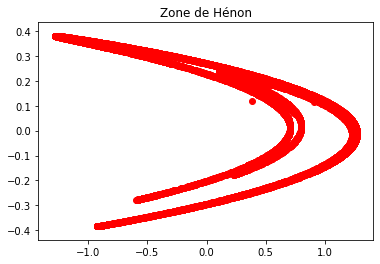

In [10]:
X, Y = zone_henon(1.4, 0.3, 10000)
plt.scatter(X, Y, color = 'red')
plt.title('Zone de Hénon')

***Calcul de la dimension de recouvrement***

In [11]:
def dimension_recouvrement_henon(a, b, N, n):
    ''' Renvoie une estimation de la dimension de recouvrement de l attracteur de Henon'''
    eps = 2/N # 2/N car le maillage se fait sur [0,2]*[-1,1]
    maillage = np.full((N, N), False)
    X, Y = zone_henon(a, b, n)
    for i in range(n+1):
        x, y = X[i], Y[i]
        maillage[int(x*(N//2)), int(y*(N//2))] = True # N//2 car le maillage se fait sur [0,2]*[-1,1]
    return np.log(maillage.sum())/np.log(N)

In [13]:
dimension_recouvrement_henon(1.4, 0.3, 2500, 55000)

1.2825225977734656

On trouve donc la valeur approchée la dimension de recouvrement. Cependant les variables n et N respectivement le nombre de terme et le nombre de case du maillage ont une très forte important sur le calcul de la variable et ils ne doivent pas être arbitrairement grand pour converger.

Regardez plutôt la case d'après :

In [19]:
print('N = 1000, n = 50000 : '+str(dimension_recouvrement_henon(1.4, 0.3, 1000, 50000)))
print('N = 1000, n = 10000 : '+str(dimension_recouvrement_henon(1.4, 0.3, 1000, 10000)))
print('N = 1000, n = 20000 : '+str(dimension_recouvrement_henon(1.4, 0.3, 1000, 20000)))
print('N = 500, n = 1000 : '+str(dimension_recouvrement_henon(1.4, 0.3, 500, 1000)))
print('N = 500, n = 5000 : '+str(dimension_recouvrement_henon(1.4, 0.3, 500, 5000)))
print('N = 500, n = 20000 : '+str(dimension_recouvrement_henon(1.4, 0.3, 500, 20000)))

N = 1000, n = 50000 : 1.3216868402037327
N = 1000, n = 10000 : 1.2441848599504772
N = 1000, n = 20000 : 1.2896852062339694
N = 500, n = 1000 : 1.0900484437751596
N = 500, n = 5000 : 1.2632948917250453
N = 500, n = 20000 : 1.3305727535105625


J'ai donc l'impression que la valeur est approchée seulement pour des couples de valeur vérifiant $n \simeq 10N$ et converge lorsqu'ils tendent vers l'infini de cette manière